## Functions

### Overview

A function is basically a block of code that only runs when it is called. Functions are a general programming tool, and can be found in many programming languages. All functions operate in three steps:

1. Call: the function is called with some inputs
2. Compute: based on the inputs, the function does something
3. Return: the function outputs the result of the computation



In [1]:
def double(x):
    return x * 2

double(double(3.5))


14.0

### Intro to Error Handling

In [2]:
def my_sqrt(x):
    """Returns the square root of a number"""
    try:
        return x ** 0.5
    except:
        raise('error')
        


In [3]:
# my_sqrt('hi')

In [4]:
from numpy import sqrt 

my_sqrt(-9)

(1.8369701987210297e-16+3j)

In [5]:

print(sqrt(10.0))
# sqrt(-9)

3.1622776601683795


In [6]:
def my_sqrt(x):
    """Returns the square root of a number"""
    try:
        return x ** 0.5
    except TypeError:
        print('x must be an int or float')


print(my_sqrt(4))
print(my_sqrt(10.0))
my_sqrt('hi')

2.0
3.1622776601683795
x must be an int or float


Raising an error!

In [7]:
def my_sqrt(x):
    """Returns the square root of a number"""
    if x < 0:
        raise TypeError('x must be non-negative')
    try:
        return x ** 0.5
    except TypeError:
        print('x must be an int or float')



In [8]:
# my_sqrt(-9)

### Comparing variables on different scales: Normalization

In [9]:
import pandas as pd

def normalize_column(df, column, inplace=False):
    """Normalize a column to have mean 0 and standard deviation 1"""
    try:
        # Check if column exists and is numeric
        if column not in df.columns:
            print("Error: column does not exist")
            return None
            
        if not pd.api.types.is_numeric_dtype(df[column]):
            print("Error: column must be numeric")
            return None
            
        # Calculate normalized values
        normalized = (df[column] - df[column].mean()) / df[column].std()
        
        # Add as new column or return the series
        if inplace:
            df[f"{column}_normalized"] = normalized
        else:
            return normalized
            
    except Exception as e:
        print(f"Error: {e}")
        return None



In [10]:
df = pd.read_csv('../data/nus_cei.csv')


In [11]:
# Add the normalized column directly to df
normalize_column(df, "_01", inplace=True) # ← note   inplace=True
normalize_column(df, "_02", inplace=True)


<function matplotlib.pyplot.show(close=None, block=None)>

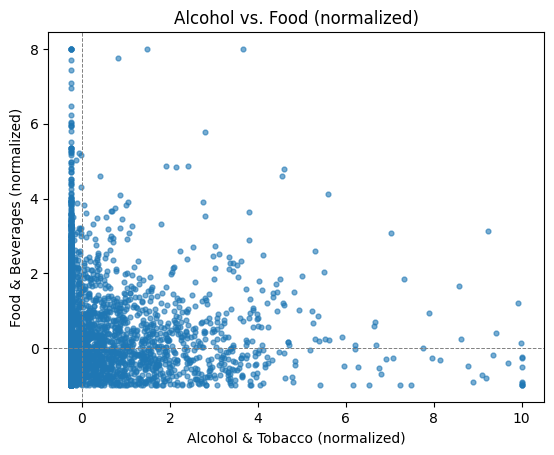

In [12]:
import matplotlib.pyplot as plt

x = df["_02_normalized"].clip(-4, 10)
y = df["_01_normalized"].clip(-4, 8)
plt.scatter(x, y, s=12, alpha=0.6)
plt.axhline(0, ls='--', c='grey', lw=0.7)
plt.axvline(0, ls='--', c='grey', lw=0.7)

plt.xlabel("Alcohol & Tobacco (normalized)")
plt.ylabel("Food & Beverages (normalized)")
plt.title("Alcohol vs. Food (normalized)")
plt.show


In [13]:
# Severe skew in Alcohol & Tobacco spending (lots of tiny values, a few huge ones).
# Relatively milder spread in Food & Beverages.

# A point at (–0.1, 3) has slightly-below-average A&T but an extreme (3 σ) F&B value, and so on.


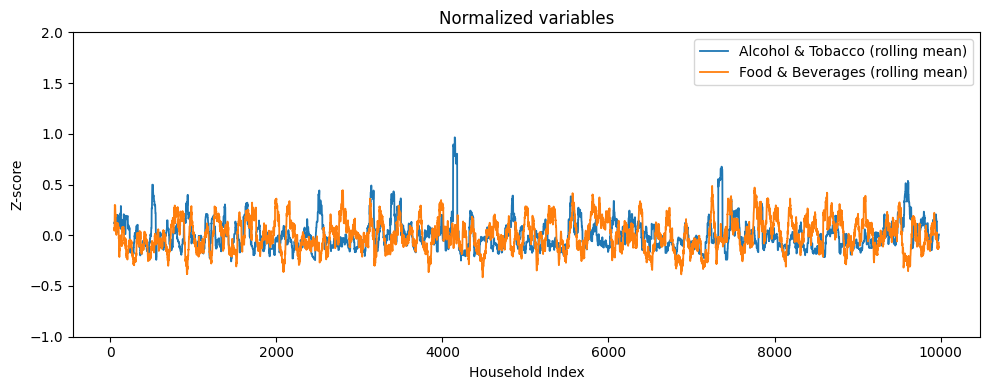

In [14]:

# Plot
plt.figure(figsize=(10, 4))

# 1. Rolling mean to calm the jaggedness
window = 50
plt.plot(df["_02_normalized"].rolling(window).mean(),
         label="Alcohol & Tobacco (rolling mean)", lw=1.3)
plt.plot(df["_01_normalized"].rolling(window).mean(),
         label="Food & Beverages (rolling mean)", lw=1.3)

# 2. Optional: limit y-axis so small differences are visible
plt.ylim(-1, 2)

plt.legend()
plt.title("Normalized variables".format(window))
plt.xlabel("Household Index")
plt.ylabel("Z-score")
plt.tight_layout()
plt.show()

In [15]:

# Example usage:
import pandas as pd


df_ais = pd.read_excel(
    '../data/bsd_dummy.xlsx',
    sheet_name='AIS',
    dtype={'SSIC2020': str}
)

normalize_column(df_ais, 'VA', inplace = True)


In [16]:
df_ais.columns

Index(['REF_YR', 'UEN', 'SSIC2020', 'EXP_FACT', 'OWNERSHIP_GROUP_CD', 'OP_REC',
       'OE', 'OS', 'VA', 'REM', 'DEPRE', 'VA_normalized'],
      dtype='object')

In [17]:
# Create a sample DataFrame
df = pd.DataFrame({
    "age": [23, 35, 58, 45, 62],
    "name": ["Alice", "Bob", "Charlie", "Diana", "Evan"]
})

# Normalize the age column and add it to the DataFrame
normalize_column(df, "age", inplace = True)
print(df)

# Try with non-existent column
normalize_column(df, "height")

# Try with non-numeric column
normalize_column(df, "name")

   age     name  age_normalized
0   23    Alice       -1.338803
1   35      Bob       -0.595024
2   58  Charlie        0.830554
3   45    Diana        0.024793
4   62     Evan        1.078480
Error: column does not exist
Error: column must be numeric


### Why is it useful?

- Comparing features measured on different scales
- (e.g., “age” in years vs. “income” in dollars)
- Puts them on the same scale (mean 0, std 1), so one feature doesn’t dominate just because it has larger raw numbers.

### Default values

What they are: Parameters given a default value in the def line, making them optional at call time.

Why use them:
- Simplify function signatures when there’s a “sensible” common case.
- Avoid overloading (no more def foo(a), def foo(a,b)—just supply defaults).



In [18]:
def greet(name, greeting="Hello", punctuation="!"):
    return f"{greeting}, {name}{punctuation}"

print(greet("Alice"))                  # Hello, Alice!
print(greet("Bob", punctuation="."))   # Hello, Bob.
print(greet("Carol", "Hi", "!!!"))     # Hi, Carol!!!


Hello, Alice!
Hello, Bob.
Hi, Carol!!!


### Functions calling other functions

One useful application of functions is to split a complex task into a series of simple steps, each carried out by a separate function, and then write a master function that calls all of those separate functions in the correct order. Having a series of simple functions makes it easier. In this way, an entire workflow can be constructed that is easy to adjust, and scalable across a large number of datasets. For example, we might have a number of sample names, and for each we want to:

1. Find the longest part of the name
2. Check whether that part begins with a vowel
3. Convert the lowercase letters to uppercase, and vice versa

Once we have done this, we want to gather the converted sample names into a list.

In [19]:
def find_name_longest_part(input_name):
    return max(input_name.split("-"), key=len)

print(find_name_longest_part("1-32-ALPHA-C"))

ALPHA


In [20]:
def check_start_vowel(input_word):
    return input_word[0].lower() in "aeiou"

print(check_start_vowel("ALPHA"))

True


In [21]:
def convert_case(input_word):
    return input_word.swapcase()

print(convert_case("ALPha"))

alpHA


In [22]:
def find_name_longest_part(input_name):
    return max(input_name.split("-"), key=len)

# print(find_name_longest_part("1-32-ALPHA-C"))

def check_start_vowel(input_word):
    return input_word[0].lower() in "aeiou"

#print(check_start_vowel("ALPHA"))

def convert_case(input_word):
    return input_word.swapcase()

# print(convert_case("ALPha"))

def convert_sample_name_parts(sample_names):
    converted = []
    for name in sample_names:
        part = find_name_longest_part(name) # Splits it on -; Picks the longest part
        if check_start_vowel(part):         # Checks whether that longest part starts with a vowel
            converted.append(convert_case(part)) #If it does, swap-cases every letter in that part
    return converted

convert_sample_name_parts(["1-32-ALPHa-C", "1-33-PHI-omega", "1-34-BETA-sigMA"])

['alphA', 'OMEGA']

# Utils.py

In [23]:
### process_ais_estabs(ais_df)
# Slices the SSIC2020 code into 2-, 3-, 4- and 5-digit columns and drops any rows with SSIC_5D = “96099”.

### generate_variables(estb_or_entp)
# Builds and returns three lists—raw variables, their “EXP_” counterparts, and the full set of class+vars+EXP_FACT—adjusted for establishment vs enterprise level.

### generate_ssic_for_clusters(estb_or_entp)
# Chooses the correct SSIC column names (2D/3D/4D/5D) depending on whether you’re clustering at the estab or entp level.

### assign_aes_clusters(ais_all_cols_df, estb_or_entp)
# Tags each firm with an AES (Annual Economic Survey) cluster based on its 2-digit SSIC slice.

### assign_itm_clusters(ais_all_cols_df, estb_or_entp)
# Tags each firm with an ITM (Industry Transformation Map) cluster using combinations of 2-, 3- and 5-digit SSIC slices.

### assign_op_rec_bands(entp_level_ais_df)
# Buckets expanded operating receipts (EXP_OP_REC) into size bands (e.g. “<= 1 mil”, “> 1 mil–<= 10 mil”, …).

### subset_or_print_all(ais_agg_df, col_to_check, list_of_interest)
# Returns ais_agg_df filtered to rows where col_to_check is in list_of_interest, or the full DataFrame if that list is empty.

### nk_check(ais_df, custom_grouping, generated_columns_sum, generated_columns_max)
# For each group, computes (max ÷ sum) × 100 on your expanded vars to see what % of total p-stats the largest firm contributes.

In [24]:
# from utils import process_ais_estabs

from utils import (
    process_ais_estabs,
    generate_variables,
    generate_ssic_for_clusters,
    assign_aes_clusters,
    assign_itm_clusters,
    assign_op_rec_bands,
    subset_or_print_all,
    nk_check,
    file_path,
    SSIC
)


import pandas as pd

In [25]:
SSIC

'SSIC2020'

In [26]:
df_ais = pd.read_excel(
    '../data/bsd_dummy.xlsx',
    sheet_name='AIS',
    dtype={'SSIC2020': str}
)

df_ais.shape



(6331, 11)

### “Enterprise” and “establishment” refer to two different units of analysis:

Enterprise level is the whole business/legal entity (identified by a single UEN). An enterprise may consist of one or more establishments. All the establishments under that enterprise roll up into one record at the enterprise level, so you get aggregate figures (total employment, total output, etc.) across the entire business group.

Establishment level is each individual site or location where economic activity takes place (e.g. a shop, a factory, an office). Every premises that enterprise operates shows up as its own row, with its own SSIC code, employment count, and other attributes.

In [27]:

# Quick peek at our utils module
import utils
help(utils.assign_aes_clusters)



Help on function assign_aes_clusters in module utils:

assign_aes_clusters(ais_all_cols_df: pandas.core.frame.DataFrame, estb_or_entp: str) -> pandas.core.frame.DataFrame
    Given establishment level data, assign AES clusters based on the SSIC of a firm.
    Returns:
        AIS dataset with all firms assigned with cluster(s)



In [28]:
df_ais.shape

(6331, 11)

In [29]:
df_ais.head()



,REF_YR,UEN,SSIC2020,EXP_FACT,OWNERSHIP_GROUP_CD,OP_REC,OE,OS,VA,REM,DEPRE
0,2020,3022000001A,35101,1.0,L,3.615949e+06,337594.61,169200.88,56701.04,79830.52,923373.53
1,2020,3022000002B,35101,1.0,F,8.105231e+07,18004.70,436688.16,915719.87,105031.41,77296.59
2,2020,3022000003C,35101,1.0,F,9.267971e+07,459900.51,922359.04,438062.65,990781.45,629491.31
3,2020,3022000004D,35101,1.0,F,9.611237e+07,768398.51,506738.21,900523.80,147700.88,732551.81
4,2020,3022000005E,35102,1.0,F,7.414472e+08,50726.70,721167.26,835382.29,802651.21,82211.52


## Process and inspect SSIC slices

Goal: Load the dummy DataFrame, call process_ais_estabs(), and print the first few rows.
Check: That you now have SSIC_2D, SSIC_3D, SSIC_4D, and SSIC_5D columns. 


In [30]:
ais_proc = process_ais_estabs(df_ais)

ais_proc.shape

(6318, 15)

In [31]:
ais_proc.head()

,REF_YR,UEN,SSIC2020,EXP_FACT,OWNERSHIP_GROUP_CD,OP_REC,OE,OS,VA,REM,DEPRE,SSIC_2D,SSIC_3D,SSIC_4D,SSIC_5D
0,2020,3022000001A,35101,1.0,L,3.615949e+06,337594.61,169200.88,56701.04,79830.52,923373.53,35,351,3510,35101
1,2020,3022000002B,35101,1.0,F,8.105231e+07,18004.70,436688.16,915719.87,105031.41,77296.59,35,351,3510,35101
2,2020,3022000003C,35101,1.0,F,9.267971e+07,459900.51,922359.04,438062.65,990781.45,629491.31,35,351,3510,35101
3,2020,3022000004D,35101,1.0,F,9.611237e+07,768398.51,506738.21,900523.80,147700.88,732551.81,35,351,3510,35101
4,2020,3022000005E,35102,1.0,F,7.414472e+08,50726.70,721167.26,835382.29,802651.21,82211.52,35,351,3510,35102


Builds lists of variable names, expanded-variable names, and subset columns based on level

In [32]:
# Generate variable lists at both levels

# Calling generate_variables('estb') and generate_variables('entp'). 
# Check: That you see three lists back:

# - raw VARS_COLS,
# - prefixed EXP_VARS_COLS,
# - full SUBSETTED_COLS.


vars_estb, exp_vars_estb, subset_cols_estb = generate_variables('estb')
vars_entp, exp_vars_entp, subset_cols_entp = generate_variables('entp')

# subset_cols_estb


vars_estb

['OP_REC', 'VA', 'OE', 'OS', 'DEPRE', 'REM', 'ESTAB_COUNT']

In [33]:
# Tags each establishment/enterprise with its AES cluster label based on its SSIC 2D code

ais_aes = assign_aes_clusters(ais_proc, 'estb')

ais_aes

,REF_YR,UEN,SSIC2020,EXP_FACT,OWNERSHIP_GROUP_CD,OP_REC,OE,OS,VA,REM,DEPRE,SSIC_2D,SSIC_3D,SSIC_4D,SSIC_5D,CLUSTER
0,2020,3022000001A,35101,1.00,L,3.615949e+06,337594.61,169200.88,56701.04,79830.52,923373.53,35,351,3510,35101,UTILITIES
1,2020,3022000002B,35101,1.00,F,8.105231e+07,18004.70,436688.16,915719.87,105031.41,77296.59,35,351,3510,35101,UTILITIES
2,2020,3022000003C,35101,1.00,F,9.267971e+07,459900.51,922359.04,438062.65,990781.45,629491.31,35,351,3510,35101,UTILITIES
3,2020,3022000004D,35101,1.00,F,9.611237e+07,768398.51,506738.21,900523.80,147700.88,732551.81,35,351,3510,35101,UTILITIES
4,2020,3022000005E,35102,1.00,F,7.414472e+08,50726.70,721167.26,835382.29,802651.21,82211.52,35,351,3510,35102,UTILITIES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6324,2022,3024002098R,96095,9.92,L,8.406964e+08,268840.02,852967.14,294341.86,591512.53,358055.31,96,960,9609,96095,"RECREATION, COMMUNITY & PERSONAL SERVICES"
6325,2022,3024002099S,96095,1.00,F,3.865047e+07,298705.07,791072.28,530044.65,122523.48,681643.70,96,960,9609,96095,"RECREATION, COMMUNITY & PERSONAL SERVICES"
6326,2022,3024002100T,96095,1.00,L,2.578838e+04,95155.69,912496.64,300912.19,537851.26,591266.34,96,960,9609,96095,"RECREATION, COMMUNITY & PERSONAL SERVICES"
6327,2022,3024002101U,96095,1.00,L,9.787030e+06,849115.09,336834.81,490910.50,977077.52,981245.79,96,960,9609,96095,"RECREATION, COMMUNITY & PERSONAL SERVICES"


In [34]:
counts = ais_aes['CLUSTER'].value_counts()
print(counts)


CLUSTER
RECREATION, COMMUNITY & PERSONAL SERVICES    1280
WHOLESALE TRADE                              1079
RETAIL TRADE                                  689
FINANCIAL & INSURANCE ACTIVITIES              630
PROFESSIONAL SERVICES                         581
TRANSPORTATION & STORAGE                      547
ADMINISTRATIVE & SUPPORT SERVICES             546
INFORMATION & COMMUNICATIONS                  487
UTILITIES                                     164
REAL ESTATE                                   100
FOOD & BEVERAGE SERVICES                       84
ACCOMMODATION                                  39
Name: count, dtype: int64


In [35]:
ais_aes.head()

,REF_YR,UEN,SSIC2020,EXP_FACT,OWNERSHIP_GROUP_CD,OP_REC,OE,OS,VA,REM,DEPRE,SSIC_2D,SSIC_3D,SSIC_4D,SSIC_5D,CLUSTER
0,2020,3022000001A,35101,1.0,L,3.615949e+06,337594.61,169200.88,56701.04,79830.52,923373.53,35,351,3510,35101,UTILITIES
1,2020,3022000002B,35101,1.0,F,8.105231e+07,18004.70,436688.16,915719.87,105031.41,77296.59,35,351,3510,35101,UTILITIES
2,2020,3022000003C,35101,1.0,F,9.267971e+07,459900.51,922359.04,438062.65,990781.45,629491.31,35,351,3510,35101,UTILITIES
3,2020,3022000004D,35101,1.0,F,9.611237e+07,768398.51,506738.21,900523.80,147700.88,732551.81,35,351,3510,35101,UTILITIES
4,2020,3022000005E,35102,1.0,F,7.414472e+08,50726.70,721167.26,835382.29,802651.21,82211.52,35,351,3510,35102,UTILITIES


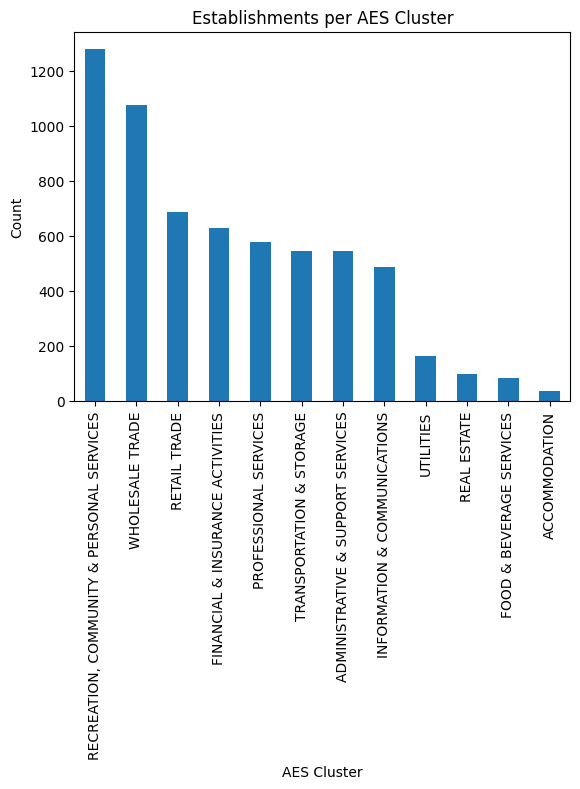

In [36]:
import matplotlib.pyplot as plt

plt.figure()
counts.plot.bar()
plt.title('Establishments per AES Cluster')
plt.xlabel('AES Cluster')
plt.ylabel('Count')
plt.show()

### Closures & Factory Functions

Closure: A function defined inside another that “remembers” variables from its enclosing scope even after that scope has finished.
Why it matters: Allows to build specialized versions of a function on the fly, with state baked in.


In [37]:
def multiplier(factor):
    """Return a function that multiplies by ‘factor’."""
    def multiply(x):
        return x * factor    # ‘factor’ is captured from the outer scope
    return multiply

doubler = multiplier(2)
tripler = multiplier(3)

print(doubler(5))  # 10
print(tripler(5))  # 15


10
15


#### Quick Exercise: Using `generate_ssic_for_clusters` 

1. **Import & call**  
   - Import `generate_ssic_for_clusters` from your `utils` module.  
   - Call it twice: once with `'estb'`, once with `'entp'`.  
   - Unpack each call into four variables:  
  
     ```python
     SSIC_5D, SSIC_4D, SSIC_3D, SSIC_2D = generate_ssic_for_clusters('estb')
     SSIC_5D_entp, SSIC_4D_entp, SSIC_3D_entp, SSIC_2D_entp = generate_ssic_for_clusters('entp')
     ```

2. **Inspect the results**  
   - Print out each of the eight variables.  
   - Briefly note how the column names differ between establishments (`estb`) and enterprises (`entp`).

3. **Verify against your DataFrame**  
   - Check that these columns actually exist in your cleaned AIS DataFrame (`ais_proc`):  
     ```python
     for col in [SSIC_5D, SSIC_4D, SSIC_3D, SSIC_2D]:
         print(col, "in ais_proc?", col in ais_proc.columns)
     ```

4. **Apply**  
   - Use the 2-digit SSIC column for establishments (`SSIC_2D`) to find the top 3 most common 2-digit codes:  
     
     ```python
     ais_proc.groupby(SSIC_2D)['UEN'].nunique().nlargest(3)
     print("Top 3 2-digit SSIC (estb):", top3_estb)
     ```
   

In [ ]:
SSIC_5D, SSIC_4D, SSIC_3D, SSIC_2D = generate_ssic_for_clusters('estb')

SSIC_5D_entp, SSIC_4D_entp, SSIC_3D_entp, SSIC_2D_entp = generate_ssic_for_clusters('entp')

SSIC_5D_entp


In [ ]:
x = generate_ssic_for_clusters('estb')
x

('SSIC_5D', 'SSIC_4D', 'SSIC_3D', 'SSIC_2D')

In [ ]:
for col in [SSIC_5D, SSIC_4D, SSIC_3D, SSIC_2D]:
         print(col, "in ais_proc?", col in ais_proc.columns)

NameError: name 'SSIC_2D' is not defined

In [ ]:
top3_estb = ais_proc.groupby(SSIC_2D)['UEN'].nunique().nlargest(3)
print("Top 3 2-digit SSIC (estb):", top3_estb)

Top 3 2-digit SSIC (estb): SSIC_2D
46    1079
47     689
66     292
Name: UEN, dtype: int64


### Continuing on with other functions...

- Tag each site with “1”
By adding a column full of 1’s, we are saying “this is one establishment.” Later you can add up those 1’s to count how many sites belong in each cluster.

- Adjust each number by a weight
Suppose each site has a number (like its employee count) and also an “exposure factor” (a weight). You multiply the two to get a new, weighted value.
e.g. 100 employees × 0.25 exposure = 25 “effective” employees.

- Group by industry cluster and sum it all up
You feed this table into a function that:
- Looks at each site’s industry code,
- Assigns it to one of the predefined “ITM clusters,”
- And then adds up all the 1’s (to get number of sites) and all the weighted values (to get total weighted employees, revenue, etc.) for each cluster.

In [ ]:
# Assign ITM clusters (more granular mapping via 2/3/5-digit SSIC)

# Create the EXP_* columns on ais_proc
ais_proc['ESTAB_COUNT'] = 1

for raw_var, exp_var in zip(vars_estb, exp_vars_estb):
    ais_proc[exp_var] = ais_proc[raw_var] * ais_proc['EXP_FACT']

# now pass ais_proc into assign_itm_clusters
ais_itm = assign_itm_clusters(ais_proc, 'estb')


In [ ]:
ais_itm.head()

,REF_YR,UEN,SSIC2020,EXP_FACT,OWNERSHIP_GROUP_CD,OP_REC,OE,OS,VA,REM,...,SSIC_5D,ESTAB_COUNT,EXP_OP_REC,EXP_VA,EXP_OE,EXP_OS,EXP_DEPRE,EXP_REM,EXP_ESTAB_COUNT,CLUSTER
0,2020,3022000001A,35101,1.0,L,3.615949e+06,337594.61,169200.88,56701.04,79830.52,...,35101,1,3.615949e+06,56701.04,337594.61,169200.88,923373.53,79830.52,1.0,UTILITIES
1,2020,3022000002B,35101,1.0,F,8.105231e+07,18004.70,436688.16,915719.87,105031.41,...,35101,1,8.105231e+07,915719.87,18004.70,436688.16,77296.59,105031.41,1.0,UTILITIES
2,2020,3022000003C,35101,1.0,F,9.267971e+07,459900.51,922359.04,438062.65,990781.45,...,35101,1,9.267971e+07,438062.65,459900.51,922359.04,629491.31,990781.45,1.0,UTILITIES
3,2020,3022000004D,35101,1.0,F,9.611237e+07,768398.51,506738.21,900523.80,147700.88,...,35101,1,9.611237e+07,900523.80,768398.51,506738.21,732551.81,147700.88,1.0,UTILITIES
4,2020,3022000005E,35102,1.0,F,7.414472e+08,50726.70,721167.26,835382.29,802651.21,...,35102,1,7.414472e+08,835382.29,50726.70,721167.26,82211.52,802651.21,1.0,UTILITIES


In [ ]:
ais_itm.shape

(6318, 24)

CLUSTER
WHOLESALE TRADE                            1057
RETAIL                                      617
FINANCIAL SERVICES                          611
INFORMATION AND COMMUNICATIONS              487
PROFESSIONAL SERVICES                       399
SEA TRANSPORT                               228
HEALTHCARE                                  217
LOGISTICS                                   135
UTILITIES                                   125
AIR TRANSPORT                               111
EDUCATION (EARLY CHILDHOOD AND TAE ITM)     111
FOOD SERVICES                                84
REAL ESTATE                                  83
LAND TRANSPORT                               64
ENVIRONMENTAL SERVICES                       39
HOTELS                                       28
SECURITY                                     21
Name: count, dtype: int64


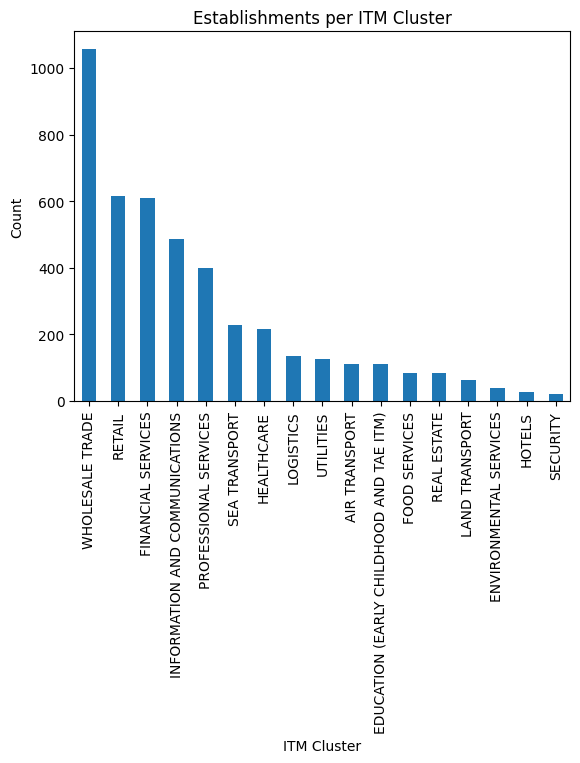

In [ ]:
counts = ais_itm['CLUSTER'].value_counts()
print(counts)

import matplotlib.pyplot as plt

plt.figure()
counts.plot.bar()
plt.title('Establishments per ITM Cluster')
plt.xlabel('ITM Cluster')
plt.ylabel('Count')
plt.show()

In [ ]:
# If we had enterprise-level data, we could bucket by operating receipts

# function name: assign_op_rec_bands


In [ ]:
# Subset to only SSICs you care about (example lists)
ssic_2D_of_interest = ['71', '72', '74']
ssic_3D_of_interest = []
#ssic_5D_of_interest = ['69101', '69102', '70101', '70102']

subset_2d = subset_or_print_all(ais_aes, 'SSIC_2D', ssic_3D_of_interest)
#subset_3d = subset_or_print_all(ais_aes, 'SSIC_3D', ssic_3D_of_interest)
#subset_5d = subset_or_print_all(ais_aes, 'SSIC_5D', ssic_5D_of_interest)

subset_2d.shape

(6318, 16)

In [ ]:
ssic_2D_of_interest = ['71', '72', '74', '78']
subset_2d = subset_or_print_all(ais_aes, 'SSIC_2D', ssic_2D_of_interest)

subset_2d.shape

In [ ]:
subset_3d.head()

In [ ]:

from utils import generate_variables

# 0) After clustering but before expansion:
ais_aes['ESTAB_COUNT'] = 1

# 1) Then create all EXP_ columns:
from utils import generate_variables

vars_estb, exp_vars_estb, _ = generate_variables('estb')
for var in vars_estb:
    exp_var = f"EXP_{var}"
    ais_aes[exp_var] = ais_aes[var] * ais_aes['EXP_FACT']



In [ ]:
# Perform an N/K check on the expanded vars for AES data
sum_dict = {col: 'sum' for col in exp_vars_estb}
max_dict = {col: 'max' for col in exp_vars_estb}
nk_results = nk_check(ais_aes, ['OWNERSHIP_GROUP_CD'], sum_dict, max_dict)

Please note that values are in percentage format...


### nk_function

The nk_check function measures how much the largest contributor in each group dominates the total. Here’s a summary:

- Grouping: The data is split into groups based on one or more columns (for example, industry cluster, ownership type, and year).

N–k concentration ratio is a measure of how concentrated a quantity (like revenue, output, or assets) is among the k largest entities in a group of N. You compute it by:

- Ordering all entities by size (e.g., revenue) within each group.

- Summing the top k largest values.

- Dividing that sum by the total of all entities’ values in the group.

- Multiplying by 100 to express it as a percentage.

A high percentage (e.g. above 90%) indicates that a single firm contributes almost all of that group’s total, signaling potential dominance or disclosure concerns.

Why it’s useful:
Regulators or statisticians often require that no single firm contributes more than 90% of an industry total—otherwise the data could be “disclosive.” This check flags any group where one firm almost entirely dominates the metric you care about.

In [ ]:
print("\nN/K check results:")
nk_results



N/K check results:


,OWNERSHIP_GROUP_CD,EXP_OP_REC,EXP_VA,EXP_OE,EXP_OS,EXP_DEPRE,EXP_REM,EXP_ESTAB_COUNT
0,F,3.152299,0.534475,0.514438,0.531531,0.516939,0.511737,0.272998
1,L,1.586327,0.226840,0.230229,0.225511,0.228297,0.226556,0.119236


In [ ]:
# 10) Inspect

print("\nN/K check results:")
nk_results

sorted_results = nk_results.sort_values(
    by="EXP_OP_REC",
    ascending=False
)

# To see the top 10 rows:
top10 = sorted_results.head(10)
print(top10)




N/K check results:
                              CLUSTER  EXP_OP_REC     EXP_VA     EXP_OE  \
0                       ACCOMMODATION   44.484125  18.392361  15.375930   
6                         REAL ESTATE   40.588472   7.872368   6.854562   
3            FOOD & BEVERAGE SERVICES   38.967318   9.034041   7.471138   
10                          UTILITIES   21.195752   4.699764   5.302487   
9            TRANSPORTATION & STORAGE   12.580360   1.736982   1.746150   
1   ADMINISTRATIVE & SUPPORT SERVICES    8.883529   1.688614   1.674436   
5               PROFESSIONAL SERVICES    7.737278   1.806754   1.566637   
8                        RETAIL TRADE    7.671035   1.295505   1.292009   
2    FINANCIAL & INSURANCE ACTIVITIES    7.344510   1.393816   1.549595   
11                    WHOLESALE TRADE    6.448049   0.867740   0.937255   

       EXP_OS  EXP_DEPRE    EXP_REM  EXP_ESTAB_COUNT  
0   14.299050  14.144066  17.463427         9.221635  
6    6.961652   7.280640   7.708867         

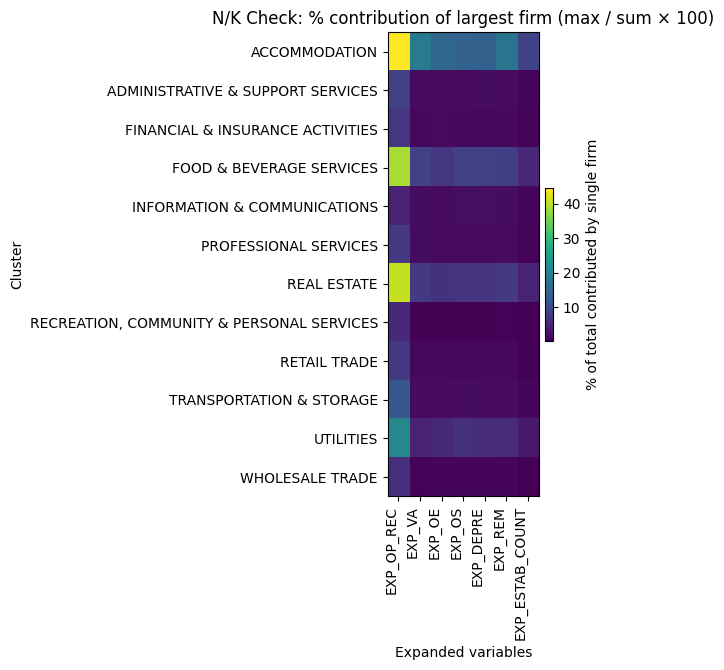

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Separate labels and heat‑map data
clusters = nk_results['CLUSTER'].astype(str)
value_cols = [c for c in nk_results.columns if c != 'CLUSTER']
heat_data = nk_results[value_cols].to_numpy()

# Create a single heat‑map figure
plt.figure(figsize=(len(value_cols) * 0.6 + 2, len(clusters) * 0.4 + 2))

img = plt.imshow(heat_data, aspect='auto')  # default colormap

# Axis labels
plt.xticks(ticks=np.arange(len(value_cols)), labels=value_cols, rotation = 90, ha='right')
plt.yticks(ticks=np.arange(len(clusters)), labels=clusters)

plt.title("N/K Check: % contribution of largest firm (max / sum × 100)")
plt.xlabel("Expanded variables")
plt.ylabel("Cluster")

# Color‑bar with a 90% reference line
cbar = plt.colorbar(img, fraction=0.046, pad=0.04)
cbar.set_label('% of total contributed by single firm')
# Draw a horizontal reference line on the colorbar at 90%
cbar.ax.hlines(90, *cbar.ax.get_xlim(), linestyle='dashed')

plt.tight_layout()
plt.show()

## Pipeline: Putting it all together

In [ ]:
import os

class PipelineError(Exception):
    """Custom exception for pipeline errors"""
    pass

def run_estab_pipeline(filepath: str, sheet_name: str = 'AIS'):
    """
    Executes the establishment-level pipeline using existing utility functions:
      1) Load AIS establishment data
      2) Process SSIC-derived columns
      3) Generate variable lists for establishments
      4) Create ESTAB_COUNT and EXP_* columns
      5) Assign ITM clusters
      6) Perform N/K concentration check

    Returns:
        df: pd.DataFrame of clustered establishments
        nk_df: pd.DataFrame of N/K check results

    Raises PipelineError on any failure.
    """
    # 1) Load data
    if not os.path.exists(filepath):
        raise PipelineError(f"File not found: {filepath}")
    try:
        df = pd.read_excel(filepath, sheet_name=sheet_name, dtype={SSIC: str})
    except Exception as e:
        raise PipelineError(f"Error loading sheet '{sheet_name}': {e}")

    # 2) Process SSIC columns
    try:
        df = process_ais_estabs(df)
    except Exception as e:
        raise PipelineError(f"Error in process_ais_estabs: {e}")

    # 3) Generate variable lists for establishment level
    try:
        raw_vars, exp_vars, _ = generate_variables('estb')
    except Exception as e:
        raise PipelineError(f"Error generating variables: {e}")

    # 4) Add ESTAB_COUNT and EXP_* columns
    if 'EXP_FACT' not in df.columns:
        raise PipelineError("Missing 'EXP_FACT' column for expansion")
    df['ESTAB_COUNT'] = 1
    for raw_var, exp_var in zip(raw_vars, exp_vars):
        if raw_var not in df.columns:
            raise PipelineError(f"Missing raw variable column: {raw_var}")
        df[exp_var] = df[raw_var] * df['EXP_FACT']

    # 5) Assign ITM clusters
    try:
        df = assign_itm_clusters(df, 'estb')
    except Exception as e:
        raise PipelineError(f"Error in assign_itm_clusters: {e}")

    # 6) N/K concentration check
    custom_grouping = ['OWNERSHIP_GROUP_CD']
    generated_columns_sum = {col: 'sum' for col in exp_vars}
    generated_columns_max = {col: 'max' for col in exp_vars}
    try:
        nk_df = nk_check(df, custom_grouping, generated_columns_sum, generated_columns_max)
    except Exception as e:
        raise PipelineError(f"Error in nk_check: {e}")

    return df, nk_df


df, nk_df = run_estab_pipeline('../data/bsd_dummy.xlsx')
print("Pipeline completed successfully. Establishments:", len(df))
print("N/K concentration results:")
print(nk_df)


result = run_estab_pipeline('../data/bsd_dummy.xlsx')
print("Pipeline completed successfully. Rows:", len(result))


Please note that values are in percentage format...
Pipeline completed successfully. Establishments: 6318
N/K concentration results:
  OWNERSHIP_GROUP_CD  EXP_OP_REC    EXP_VA    EXP_OE    EXP_OS  EXP_DEPRE  \
0                  F    3.152299  0.534475  0.514438  0.531531   0.516939   
1                  L    1.586327  0.226840  0.230229  0.225511   0.228297   

    EXP_REM  EXP_ESTAB_COUNT  
0  0.511737         0.272998  
1  0.226556         0.119236  
Please note that values are in percentage format...
Pipeline completed successfully. Rows: 2


### Decorators

In [ ]:
import time
from functools import wraps

def timer(func):
    """
    Decorator that prints the execution time of the wrapped function.
    """
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        elapsed = time.perf_counter() - start
        print(f"{func.__name__} executed in {elapsed:.3f}s")
        return result
    return wrapper

In [ ]:
import os

@timer
def run_estab_pipeline(filepath: str, sheet_name: str = 'AIS'):
    """
    Executes the establishment-level pipeline using existing utility functions:
      1) Load AIS establishment data
      2) Process SSIC-derived columns
      3) Generate variable lists for establishments
      4) Create ESTAB_COUNT and EXP_* columns
      5) Assign ITM clusters
      6) Perform N/K concentration check

    Returns:
        df: pd.DataFrame of clustered establishments
        nk_df: pd.DataFrame of N/K check results

    Raises PipelineError on any failure.
    """
    # 1) Load data
    if not os.path.exists(filepath):
        raise PipelineError(f"File not found: {filepath}")
    try:
        df = pd.read_excel(filepath, sheet_name=sheet_name, dtype={SSIC: str})
    except Exception as e:
        raise PipelineError(f"Error loading sheet '{sheet_name}': {e}")

    # 2) Process SSIC columns
    try:
        df = process_ais_estabs(df)
    except Exception as e:
        raise PipelineError(f"Error in process_ais_estabs: {e}")

    # 3) Generate variable lists for establishment level
    try:
        raw_vars, exp_vars, _ = generate_variables('estb')
    except Exception as e:
        raise PipelineError(f"Error generating variables: {e}")

    # 4) Add ESTAB_COUNT and EXP_* columns
    if 'EXP_FACT' not in df.columns:
        raise PipelineError("Missing 'EXP_FACT' column for expansion")
    df['ESTAB_COUNT'] = 1
    for raw_var, exp_var in zip(raw_vars, exp_vars):
        if raw_var not in df.columns:
            raise PipelineError(f"Missing raw variable column: {raw_var}")
        df[exp_var] = df[raw_var] * df['EXP_FACT']

    # 5) Assign ITM clusters
    try:
        df = assign_itm_clusters(df, 'estb')
    except Exception as e:
        raise PipelineError(f"Error in assign_itm_clusters: {e}")

    # 6) N/K concentration check
    custom_grouping = ['CLUSTER', 'OWNERSHIP_GROUP_CD', 'REF_YR']
    generated_columns_sum = {col: 'sum' for col in exp_vars}
    generated_columns_max = {col: 'max' for col in exp_vars}
    try:
        nk_df = nk_check(df, custom_grouping, generated_columns_sum, generated_columns_max)
    except Exception as e:
        raise PipelineError(f"Error in nk_check: {e}")

    return df, nk_df


df, nk_df = run_estab_pipeline('../data/bsd_dummy.xlsx')
print("Pipeline completed successfully. Establishments:", len(df))
print("N/K concentration results:")
print(nk_df.head())
